# IMPORTING LIBRARIES

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load COCO class names
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Get layer names
layer_names = net.getLayerNames()

# Handle both 1D and 2D outputs from getUnconnectedOutLayers
unconnected_layers = net.getUnconnectedOutLayers()

if isinstance(unconnected_layers[0], list):
    output_layers = [layer_names[i[0] - 1] for i in unconnected_layers]
else:
    output_layers = [layer_names[i - 1] for i in unconnected_layers]

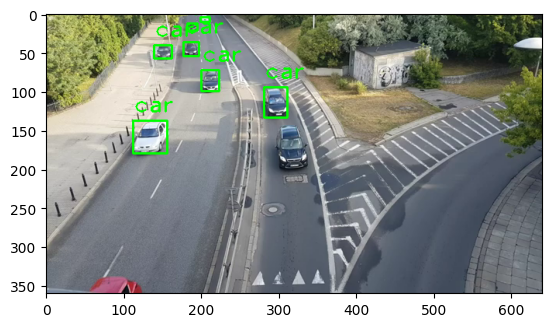

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Load video
cap = cv2.VideoCapture("4K Road traffic video for object detection and tracking - free download now!.mp4")

# Set up the Matplotlib figure for live display
plt.ion()  # Turn interactive mode on
fig, ax = plt.subplots()  # Create a new figure and axes

# Variable to control the loop
stop_loop = False

# Function to handle keyboard events
def on_key(event):
    global stop_loop
    if event.key == 'q':  # Press 'q' to stop
        stop_loop = True

# Connect the key press event handler
fig.canvas.mpl_connect('key_press_event', on_key)

while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret or stop_loop:
        break

    height, width, channels = frame.shape

    # Create a blob from the frame to be passed into the neural network
    blob = cv2.dnn.blobFromImage(frame, 1/255, (416, 416), (0, 0, 0), swapRB = True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Initialize lists to hold detection data
    class_ids = []
    confidences = []
    boxes = []

    # Loop through each output layer
    for out in outs:
        for detection in out:
            # Get the scores, class_id, and confidence of the detected object
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            
            # Filter detections by confidence and class
            if confidence > 0.5 and class_id == classes.index("car"):
                # Object detected, get box coordinates
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                
                # Calculate top-left corner of the bounding box
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                
                # Append box coordinates, confidence, and class ID to respective lists
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Perform non-maxima suppression to remove overlapping boxes
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Loop over the remaining boxes after non-maxima suppression
    for i in range(len(boxes)):
        # Only proceed if the current box is kept after suppression
        if i in indexes:
            # Get the coordinates of the bounding box
            x, y, w, h = boxes[i]
            
            # Get the class label (e.g., "car") for the detected object
            label = str(classes[class_ids[i]])
            
            # Draw bounding boxes and labels on the frame
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)

    # Convert the frame from BGR to RGB for Matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Clear the plot and display the updated frame
    ax.clear()
    ax.imshow(frame_rgb)
    plt.draw()
    plt.pause(0.001)

# Release the video capture and close all plots
cap.release()
plt.close()